# Q learning

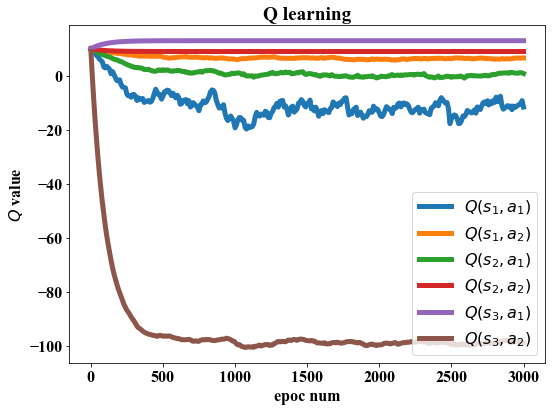

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Environment:
    def __init__(self):
        self.state = np.array([0,1,2,3])
        self.action = np.array([0,1])
        self.reward = np.array([[0, 1], [-1, 1], [5, -100], [0, 0]])
        self.state_next = np.array([[2,1],[0,3],[3,0],[None,None]])
        
        self.prob_a = 0.5
        self.td_rate = 0.01
        self.dump_coef = 0.8
        self.episode = 3000
        self.q_init = 10
        
        self.q = np.zeros(self.reward.shape)
        self.q += self.q_init

class Learn:
    def __init__(self):
        self.env = Environment()
        
    def action_prob(self, prob_a=1/2):
        if random.random() <= prob_a:
            return 0
        else:
            return 1
    
    #Q-learning
    def q_learning(self):
        for s in self.env.state:
            for a in self.env.action:
                if self.env.state_next[s][a] == None:
                    continue
                elif random.random() > self.env.prob_a:
                    td = self.env.reward[s][a] + self.env.dump_coef * max(self.env.q[self.env.state_next[s][a]]) - self.env.q[s][a]
                else:
                    td = self.env.reward[s][a] + self.env.dump_coef * self.env.q[self.env.state_next[s][a],[self.action_prob()]] - self.env.q[s][a]
                self.env.q[s][a] += self.env.td_rate * td
                
    def learn_main(self):
        result_step = []
        result_q = []
        for step in range(self.env.episode):
            self.q_learning()
            if (step + 1) % 10 == 0 or step == 0:
                result_step.append(step + 1)
                result_q.append(self.env.q.tolist())
        
        return result_step, result_q

    def plot_result(self, result_step, result_q):
        # 結果のプロット
        plt.figure(figsize=(8,6))
        plt.rcParams["font.family"] = "Times New Roman"
        
        result_q = np.array(result_q).transpose([1, 2, 0])
        for s in range(result_q.shape[0]):
            for a in range(result_q[s].shape[0]):
                if self.env.state_next[s][a] == None: continue
                plt.plot(
                    result_step,
                    result_q[s][a],
                    label='$Q(s_{}, a_{})$'.format(s + 1, a + 1),
                    lw=5
                )
        
        plt.rcParams['font.size'] = 16 #フォントサイズを設定 default : 12
        plt.rcParams['xtick.labelsize'] = 16 # 横軸のフォントサイズ
        plt.rcParams['ytick.labelsize'] = 16 # 縦軸のフォントサイズ
        plt.ylabel("$Q$ value")
        plt.xlabel("epoc num")
        plt.title("Q learning")
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()
        
def main():
    run = Learn()
    step, q = run.learn_main()
    run.plot_result(step, q)
    
if __name__ == '__main__':
    main()

# Sarsa

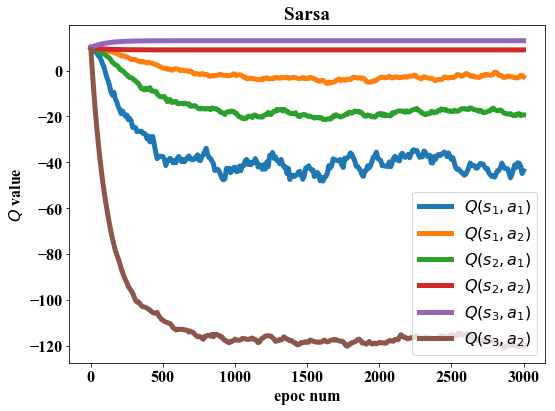

In [24]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import random

#paramerter setting
class Environment:
    def __init__(self):
        self.state = np.array([0, 1, 2, 3])
        self.action = np.array([0, 1])
        self.reward = np.array([[0, 1], [-1, 1], [5, -100], [0, 0]])
        self.state_next = np.array([[2, 1], [0, 3], [3, 0], [None, None]])
        
        self.a1_per = 0.5 # 選択確率
        self.alpha = 0.01 # 学習係数
        self.gamma = 0.8 # 減衰率
        self.epi = 3000 # エポック数
        self.q_init = 10 # 初期価値
        
        self.q = np.zeros(self.reward.shape)
        self.q += self.q_init

    #方策
    def policy(self):
        if random.random() <= self.a1_per:
            return 0
        else:
            return 1

    #Sarsa
    def sarsa(self):
        for s in self.state:
            for a in self.action:
                if self.state_next[s][a] == None: continue
                td = self.reward[s][a] + self.gamma * self.q[self.state_next[s][a], self.policy()] - self.q[s][a]
                self.q[s][a] += self.alpha * td

    def learn(self):
        result_step = []
        result_q = []
        for step in range(self.epi):
            self.sarsa()
            if (step + 1) % 10 == 0 or step == 0:
                result_step.append(step + 1)
                result_q.append(self.q.tolist())
        return result_step, result_q

    def plot_result(self, result_step, result_q):
        #結果のプロット
        plt.figure(figsize=(8,6))
        plt.rcParams["font.family"] = "Times New Roman"
        
        result_q = np.array(result_q).transpose([1, 2, 0])
        for s in range(result_q.shape[0]):
            for a in range(result_q[s].shape[0]):
                if self.state_next[s][a] == None: continue
                plt.plot(
                    result_step,
                    result_q[s][a],
                    label='$Q(s_{}, a_{})$'.format(s + 1, a + 1),
                    lw=5
                )
        
        plt.rcParams['font.size'] = 16 #フォントサイズを設定 default : 12
        plt.rcParams['xtick.labelsize'] = 16 # 横軸のフォントサイズ
        plt.rcParams['ytick.labelsize'] = 16 # 縦軸のフォントサイズ
        plt.ylabel("$Q$ value")
        plt.xlabel("epoc num")
        plt.title("Sarsa")
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

def main():
    run = Environment()
    step, q = run.learn()
    run.plot_result(step, q)
    
if __name__ == '__main__':
    main()